<a href="https://colab.research.google.com/github/zrtashi/AI/blob/main/RealEstate_LinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Model**

In [2]:
import warnings  # Import the warnings module to manage and filter warning messages during runtime

import pandas as pd  # Import the pandas library for data manipulation and analysis, especially with DataFrames

import matplotlib.pyplot as plt  # Import Matplotlib's pyplot module for creating static 2D plots and visualizations

import plotly.express as px  # Import Plotly Express for creating interactive plots and visualizations

from sklearn.linear_model import LinearRegression  # Import LinearRegression class from scikit-learn for creating linear regression models

from sklearn.metrics import mean_absolute_error  # Import mean_absolute_error from scikit-learn to evaluate model performance using the mean absolute error metric

from sklearn.utils.validation import check_is_fitted  # Import check_is_fitted from scikit-learn to ensure that an estimator (like a model) has been fitted before making predictions



In [6]:
def wrangle(filepath):
  df = pd.read_csv(filepath)
  # subset to "DHA Defence, Lahore, Punjab"
  mask_ddlp = df["Location"].str.contains("DHA Defence, Lahore, Punjab")
  df = df[mask_ddlp]

  # Convert the Price and Area columns
  df["Price_Rs"] = df["Price"].apply(convert_price)
  df["Area[Marla]"] = df["Area"].apply(convert_to_marla)
  # Drop unnecessary columns
  df.drop(columns=["Area", "Laundry Room", "Gym", "Powder Room", "Steam Room", "No additional rooms", "Prayer Rooms", "Price"], inplace = True)

  # drop null values
  df.dropna(inplace=True)
  return df



df = wrangle('/content/data.csv')


In [ ]:
df.shape

(7500, 16)

In [ ]:
df.head()

,Location,Area,Baths,Beds,Dining Room,Laundry Room,Store Rooms,Kitchens,Drawing Room,Gym,Powder Room,Steam Room,No additional rooms,Prayer Rooms,Lounge or Sitting Room,Price
0,"Bahria Town, Lahore, Punjab",10 Marla,-,-,0,0,0,0,0,0,0,0,1,0,0,PKR3.5 Crore
1,"Al Rehman Garden, Lahore, Punjab",4 Marla,4,3,1,1,1,2,1,0,0,0,0,1,0,PKR1.32 Crore
2,"Central Park Housing Scheme, Lahore, Punjab",5 Marla,4,3,0,0,0,0,0,0,0,0,1,0,0,PKR1.74 Crore
3,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,0,0,0,0,0,0,0,0,0,0,0,PKR10.3 Crore
4,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,1,1,2,2,1,0,1,1,0,1,1,PKR8.25 Crore


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Location                7500 non-null   object
 1   Area                    7500 non-null   object
 2   Baths                   7500 non-null   object
 3   Beds                    7500 non-null   object
 4   Dining Room             7500 non-null   int64 
 5   Laundry Room            7500 non-null   int64 
 6   Store Rooms             7500 non-null   int64 
 7   Kitchens                7500 non-null   int64 
 8   Drawing Room            7500 non-null   int64 
 9   Gym                     7500 non-null   int64 
 10  Powder Room             7500 non-null   int64 
 11  Steam Room              7500 non-null   int64 
 12  No additional rooms     7500 non-null   int64 
 13  Prayer Rooms            7500 non-null   int64 
 14  Lounge or Sitting Room  7500 non-null   int64 
 15  Pric

In [ ]:
df["Location"].value_counts()



,count
Location,
"DHA Defence, Lahore, Punjab",1096
"DHA Defence, Karachi, Sindh",655
"Bahria Town Karachi, Karachi, Sindh",599
"DHA Defence, Islamabad, Islamabad Capital",416
"G-13, Islamabad, Islamabad Capital",343
...,...
"Al Jalil Garden, Lahore, Punjab",1
"Youhanabad, Lahore, Punjab",1
"West Wood Housing Society, Lahore, Punjab",1


# **We will develop Linear Model to predict "DHA Defence, Lahore, Punjab " price**

In [ ]:
df["Price"].head(10)

,Price
0,PKR3.5 Crore
1,PKR1.32 Crore
2,PKR1.74 Crore
3,PKR10.3 Crore
4,PKR8.25 Crore
5,PKR15 Crore
6,PKR85 Lakh
7,PKR63 Lakh
8,PKR8.9 Crore
9,PKR17 Crore


## Make a function to remove "PKR" prefix and convert Price in numerical values

In [4]:


def convert_price(price_str):
    # Remove 'PKR' prefix
    price_str = price_str.replace("PKR", "").strip()

    # Convert Crore to numerical value
    if "Crore" in price_str:
        price_str = price_str.replace("Crore", "").strip()
        return float(price_str) * 1e7  # 1 Crore = 10 million (1e7)

    # Convert Lakh to numerical value
    elif "Lakh" in price_str:
        price_str = price_str.replace("Lakh", "").strip()
        return float(price_str) * 1e5  # 1 Lakh = 100 thousand (1e5)

    return None  # In case the format is unexpected

# Apply the conversion to the Price column
#df["Price_Rs"] = df["Price"].apply(convert_price)



In [ ]:
df.head(3)

,Location,Area,Baths,Beds,Dining Room,Laundry Room,Store Rooms,Kitchens,Drawing Room,Gym,Powder Room,Steam Room,No additional rooms,Prayer Rooms,Lounge or Sitting Room,Price,Price_Rs
3,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,0,0,0,0,0,0,0,0,0,0,0,PKR10.3 Crore,103000000.0
4,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,1,1,2,2,1,0,1,1,0,1,1,PKR8.25 Crore,82500000.0
5,"DHA Defence, Lahore, Punjab",2 Kanal,6,5,1,1,1,2,1,0,1,1,0,1,1,PKR15 Crore,150000000.0


In [ ]:
df["Area"].unique()[60:80]

array(['5.3 Marla', '11.9 Marla', '10.9 Marla', '1.6 Kanal', '3.5 Kanal',
       '3.8 Marla', '7.1 Marla', '4.8 Marla', '0.2 Marla', '2.1 Marla',
       '2.2 Marla', '1.4 Kanal', '125 Sq. Yd.', '272 Sq. Yd.',
       '152 Sq. Yd.', '235 Sq. Yd.', '250 Sq. Yd.', '240 Sq. Yd.',
       '288 Sq. Yd.', '400 Sq. Yd.'], dtype=object)

# Convert "Kanal", "Sq"and "Yd" into Marla , Make new column "Area[Marla]"

In [5]:
def convert_to_marla(area_str):
    area_str = area_str.strip()  # Remove leading/trailing spaces

    if 'Kanal' in area_str:
        area = float(area_str.replace('Kanal', '').strip())
        return area * 20  # Convert Kanal to Marla

    elif 'Sq. Yd.' in area_str:
        area = float(area_str.replace('Sq. Yd.', '').strip().replace(',', ''))
        return area * 0.0278  # Convert Square Yard to Marla

    elif 'Marla' in area_str:
        area = float(area_str.replace('Marla', '').strip())
        return area  # Already in Marla

    else:
        return float(area_str)  # Assume it's already a number in Marla

# Apply the function to the Area column
#df["Area[Marla]"] = df["Area"].apply(convert_to_marla)


In [ ]:
df.head(3)

,Location,Area,Baths,Beds,Dining Room,Laundry Room,Store Rooms,Kitchens,Drawing Room,Gym,Powder Room,Steam Room,No additional rooms,Prayer Rooms,Lounge or Sitting Room,Price,Price_Rs,Area[Marla]
0,"Bahria Town, Lahore, Punjab",10 Marla,-,-,0,0,0,0,0,0,0,0,1,0,0,PKR3.5 Crore,35000000.0,10.0
1,"Al Rehman Garden, Lahore, Punjab",4 Marla,4,3,1,1,1,2,1,0,0,0,0,1,0,PKR1.32 Crore,13200000.0,4.0
2,"Central Park Housing Scheme, Lahore, Punjab",5 Marla,4,3,0,0,0,0,0,0,0,0,1,0,0,PKR1.74 Crore,17400000.0,5.0


# Remove irrelevent columns write code at above wrangle function
drop columns = ["Area", "Laundry Room", "Gym", "Powder Room", "Steam Room", "No additional rooms", "Prayer Rooms", "Price"], inplace True)

In [ ]:
# After removed unnecessery columns
df.head()

,Location,Baths,Beds,Dining Room,Store Rooms,Kitchens,Drawing Room,Lounge or Sitting Room,Price_Rs,Area[Marla]
3,"DHA Defence, Lahore, Punjab",6,5,0,0,0,0,0,103000000.0,20.0
4,"DHA Defence, Lahore, Punjab",6,5,1,2,2,1,1,82500000.0,20.0
5,"DHA Defence, Lahore, Punjab",6,5,1,1,2,1,1,150000000.0,40.0
10,"DHA Defence, Lahore, Punjab",4,3,0,0,0,0,0,26000000.0,5.0
11,"DHA Defence, Lahore, Punjab",6,5,0,1,0,0,0,110000000.0,20.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 3 to 2497
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Location                1096 non-null   object
 1   Baths                   1096 non-null   object
 2   Beds                    1096 non-null   object
 3   Dining Room             1096 non-null   int64 
 4   Store Rooms             1096 non-null   int64 
 5   Kitchens                1096 non-null   int64 
 6   Drawing Room            1096 non-null   int64 
 7   Lounge or Sitting Room  1096 non-null   int64 
 8   Price                   1096 non-null   object
dtypes: int64(5), object(4)
memory usage: 85.6+ KB


# **Create a histogram of "Area[Marla]"**

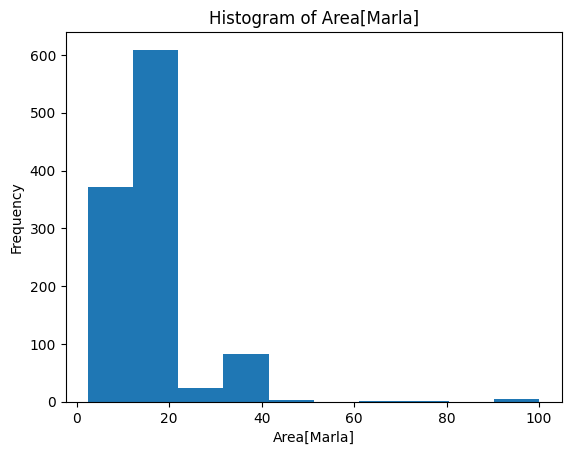

In [ ]:
# Plot a histogram of the 'Area[Marla]' column
plt.hist(df['Area[Marla]'])
# Set the label for the x-axis
plt.xlabel('Area[Marla]')
# Set the label for the y-axis
plt.ylabel('Frequency')
# Set the title of the plot
plt.title('Histogram of Area[Marla]')
plt.show()

# Histogram show there are outliers in Dataset

In [ ]:
#summary statistics
df['Area[Marla]'].describe()

,Area[Marla]
count,1096.000000
mean,17.872628
std,10.609240
min,2.500000
25%,10.000000
50%,20.000000
75%,20.000000
max,100.000000


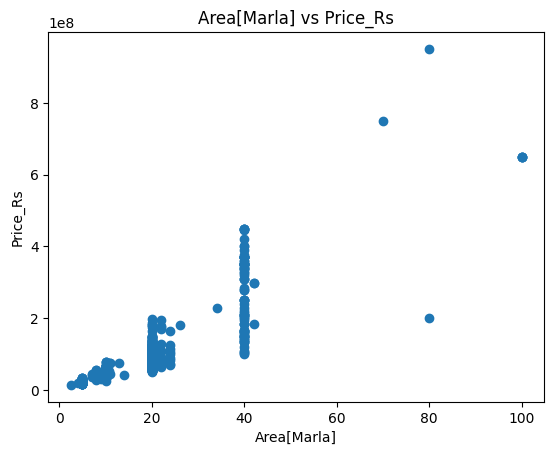

In [ ]:
# Create a scatter plot with 'Area[Marla]' on the x-axis and 'Price_Rs' on the y-axis
plt.scatter(x = df['Area[Marla]'], y = df['Price_Rs'])
# Set the label for the x-axis
plt.xlabel('Area[Marla]')
# Set the label for the y-axis
plt.ylabel('Price_Rs')
# Set the title of the plot
plt.title('Area[Marla] vs Price_Rs')
plt.show()

# **Split Data**

In [7]:
# Feature matrix  "X_train" to train model
features = ["Area[Marla]"]
X_train = df[features]
X_train

,Area[Marla]
3,20.0
4,20.0
5,40.0
10,5.0
11,20.0
...,...
2487,20.0
2488,20.0
2489,20.0
2490,20.0


In [8]:
# Target vector "y_train", which will use to train  model
target = "Price_Rs"
y_train = df[target]
y_train.shape


(1096,)

# **Build Model**

In [10]:
# Calculate the mean of the y_train value
y_mean = y_train.mean().round(2)
y_mean

86567335.77

In [11]:
# Create a baseline prediction by repeating the mean value of y_train for each observation in y_train
y_pred_baseline = [y_mean] * len(y_train)

Text(0.5, 1.0, 'Area[Marla] vs Price_Rs')

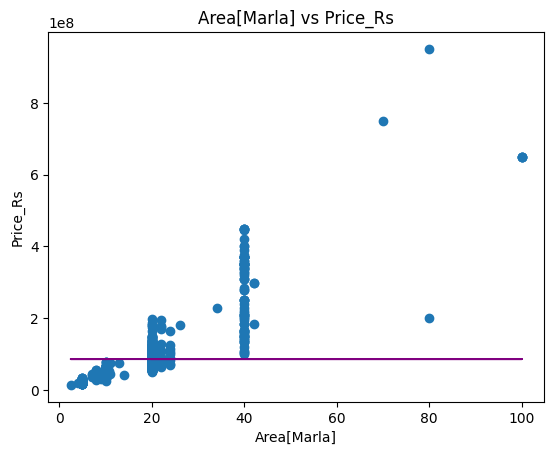

In [12]:
# Plot the baseline model predictions as a line (all predictions are the mean of y_train)
plt.plot(X_train.values, y_pred_baseline, color="purple", label="Baseline Model")

# Scatter plot of the actual data points (Area[Marla] vs. Price_Rs)
plt.scatter(X_train, y_train)

# Set the label for the x-axis
plt.xlabel("Area[Marla]")

# Set the label for the y-axis
plt.ylabel("Price_Rs")

# Set the title of the plot
plt.title("Area[Marla] vs Price_Rs")


In [13]:
# Calculate the baseline mean absolute error (MAE) between the actual y_train values and the baseline predictions
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

# Print the mean of y_train, rounded to 2 decimal places
print("Mean price:", round(y_mean, 2))

# Print the baseline MAE, rounded to 2 decimal places
print("Baseline MAE:", round(mae_baseline, 2))


Mean price: 86567335.77
Baseline MAE: 44502117.86


In [14]:
# Instantiate a LinearRegression model
model = LinearRegression()

In [15]:
# Fit model
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the target values for the training data using the fitted model
y_pred_training = model.predict(X_train)

# Display the first 10 predicted values for the training data
y_pred_training[:10]


array([1.00669401e+08, 1.00669401e+08, 2.33246717e+08, 1.23641373e+06,
       1.00669401e+08, 1.23641373e+06, 2.33246717e+08, 1.00669401e+08,
       1.00669401e+08, 1.00669401e+08])

In [17]:
# Calculate the Mean Absolute Error (MAE) for the training predictions
mae_training = mean_absolute_error(y_train, y_pred_training)

# Print the training MAE, rounded to 2 decimal places
print("Training MAE:", round(mae_training, 2))


Training MAE: 28463585.17


In [18]:
# Save the DataFrame to a CSV file named 'test_data.csv' without including the index
df.to_csv("test_data.csv", index=False)


In [19]:
# Load the test data from the CSV file and select the features used for prediction
X_test = pd.read_csv("/content/test_data.csv")[features]

# Use the fitted model to make predictions on the test data
y_pred_test = pd.Series(model.predict(X_test))

# Display the first 5 predicted values for the test data
y_pred_test.head()


,0
0,1.006694e+08
1,1.006694e+08
2,2.332467e+08
3,1.236414e+06
4,1.006694e+08


In [20]:
# Get the intercept of the fitted Linear Regression model and round it to 2 decimal places
intercept = round(model.intercept_, 2)

# Print the model's intercept
print("Model Intercept:", intercept)

# Assert that the intercept is either an integer or a float
assert any([isinstance(intercept, int), isinstance(intercept, float)])


Model Intercept: -31907915.37


In [21]:
# Get the coefficient for the first feature of the fitted Linear Regression model and round it to the nearest integer
coefficient = round(model.coef_[0])

# Print the rounded coefficient value for the feature "Area[Marla]"
print('Model coefficient for "Area[Marla]":', coefficient)

# Assert that the coefficient is either an integer or a float
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])


Model coefficient for "Area[Marla]": 6628866


In [22]:
# Print the linear regression model's formula using the intercept and coefficient values
print(f"marla_price = {intercept} + {coefficient} * area")


marla_price = -31907915.37 + 6628866 * area


In [23]:
# Calculate the price for  25 Marla
area = 25
predicted_price = intercept + coefficient * area

# Print the predicted price
print(f"marla_price = {intercept} + {coefficient} * {area} = {predicted_price}")

marla_price = -31907915.37 + 6628866 * 25 = 133813734.63


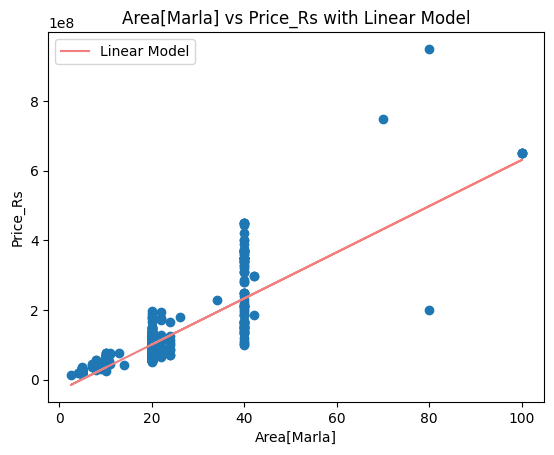

In [24]:
# Plot the linear regression model's predictions on the training data
plt.plot(X_train.values, model.predict(X_train), color="lightcoral", label="Linear Model")

# Scatter plot of the actual training data points
plt.scatter(X_train, y_train)

# Display the plot
plt.xlabel("Area[Marla]")  # Label for the x-axis
plt.ylabel("Price_Rs")     # Label for the y-axis
plt.title("Area[Marla] vs Price_Rs with Linear Model")  # Title of the plot
plt.legend()  # Show the legend to differentiate between the linear model and scatter points
plt.show()  # Display the plot
